In [ ]:
import pandas as pd
import sklearn
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import os
import matplotlib.pyplot as plt

plt.rcParams.update({
    "font.size": 9,
    "axes.titlesize": 9,
    "axes.labelsize": 9,
    "xtick.labelsize": 9,
    "ytick.labelsize": 9,
    "legend.fontsize": 8,
    "lines.linewidth": 2,
    "lines.markersize": 3,
})

df_pv_yearly = pd.read_csv('pv_metrics_yearly.csv')
df_pv_sprsum = pd.read_csv('pv_metrics_3-9.csv')
df_pv_summer = pd.read_csv('pv_metrics_6-8.csv')
df_pv_winter = pd.read_csv('pv_metrics_1-3.csv')
df_pv_summer_disagg = pd.read_csv('pv_metrics_6-8_disagg.csv')
df_pv_winter_disagg = pd.read_csv('pv_metrics_1-3_disagg.csv')


df_xg_yearly = pd.read_csv('xg_metrics_yearly.csv')
df_xg_sprsum = pd.read_csv('xg_metrics_3-9.csv')
df_xg_summer = pd.read_csv('xg_metrics_6-8.csv')
df_xg_winter = pd.read_csv('xg_metrics_1-3.csv')
df_xg_summer_disagg = pd.read_csv('xg_metrics_6-8_disagg.csv')
df_xg_winter_disagg = pd.read_csv('xg_metrics_1-3_disagg.csv')



In [2]:
df_pv_summer_disagg

,Month,MAE,RMSE,MAPE,R²,nRMSE
0,Jun,1055.232949,1582.819413,63.652193,0.965057,7.298000
1,Jul,1037.140630,1633.575869,21.028172,0.963348,7.640655
2,Aug,1124.796775,1866.532717,49.080011,0.951796,8.800498


In [3]:
df_pv_winter_disagg

,Month,MAE,RMSE,MAPE,R²,nRMSE
0,Jan,1488.523547,3145.940479,130.055999,0.557443,22.305386
1,Feb,927.676129,1688.700778,93.246125,0.930332,9.817314
2,Mar,1655.495464,2740.469129,197.009850,0.724447,19.356740


In [4]:
df_xg_summer_disagg

,Month,MAE,RMSE,MAPE,R²,nRMSE
0,Jun,4631.953239,5969.219230,45.062946,0.283410,24.949715
1,Jul,4953.590904,6530.555236,49.346218,0.128788,27.211781
2,Aug,4311.800127,5602.948040,129.728589,0.448806,24.182952


In [5]:
df_xg_winter_disagg 

,Month,MAE,RMSE,MAPE,R²,nRMSE
0,Jan,2445.146071,3411.536811,51.178089,0.540251,20.056066
1,Feb,4285.405124,5290.595032,50.973814,0.137319,27.289395
2,Mar,4110.358191,5096.619752,52.811617,-0.374790,29.818744


In [6]:
# Check what's actually in the Month columns
print("Winter Prophet months:", df_pv_winter['Month'].unique())
print("Winter Prophet disagg months:", df_pv_winter_disagg['Month'].unique())
print("\nSummer Prophet months:", df_pv_summer['Month'].unique())
print("Summer Prophet disagg months:", df_pv_summer_disagg['Month'].unique())

print("\nWinter XGBoost months:", df_xg_winter['Month'].unique())
print("Summer XGBoost months:", df_xg_summer['Month'].unique())

Winter Prophet months: ['Jan' 'Feb' 'Mar']
Winter Prophet disagg months: ['Jan' 'Feb' 'Mar']

Summer Prophet months: ['Jun' 'Jul' 'Aug']
Summer Prophet disagg months: ['Jun' 'Jul' 'Aug']

Winter XGBoost months: ['Jan' 'Feb' 'Mar']
Summer XGBoost months: ['Jun' 'Jul' 'Aug']


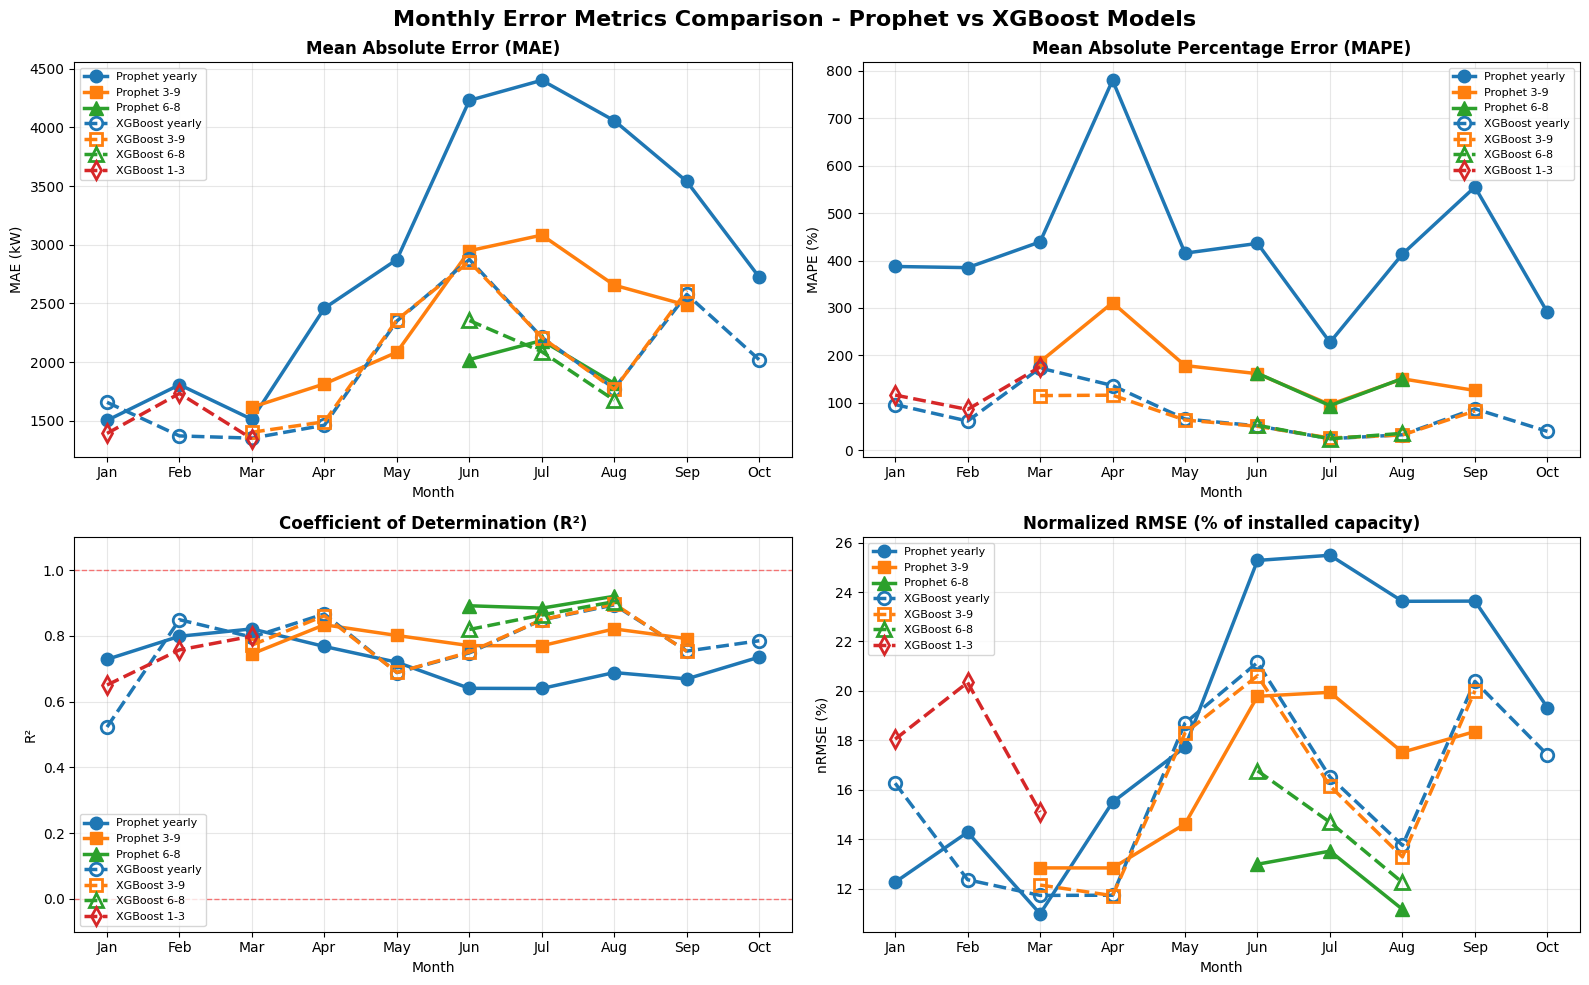

In [7]:
# Create figure with 4 subplots (2x2 grid)
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('Monthly Error Metrics Comparison - Prophet vs XGBoost Models', fontsize=16, fontweight='bold')

# Flatten axes for easier indexing
axes = axes.flatten()

# Define months for each dataset
months_pv_yearly = df_pv_yearly['Month'].tolist()
months_pv_sprsum = df_pv_sprsum['Month'].tolist()
months_pv_summer = df_pv_summer['Month'].tolist()

months_xg_yearly = df_xg_yearly['Month'].tolist()
months_xg_sprsum = df_xg_sprsum['Month'].tolist()
months_xg_summer = df_xg_summer['Month'].tolist()
months_xg_winter = df_xg_winter['Month'].tolist()

# Plot 1: Mean Absolute Error (MAE)
# Prophet models - solid lines with filled markers
axes[0].plot(months_pv_yearly, df_pv_yearly['MAE'], marker='o', color='#1f77b4', linewidth=2.5, markersize=9, linestyle='-', markerfacecolor='#1f77b4', markeredgecolor='#1f77b4', label='Prophet yearly')
axes[0].plot(months_pv_sprsum, df_pv_sprsum['MAE'], marker='s', color='#ff7f0e', linewidth=2.5, markersize=9, linestyle='-', markerfacecolor='#ff7f0e', markeredgecolor='#ff7f0e', label='Prophet 3-9')
axes[0].plot(months_pv_summer, df_pv_summer['MAE'], marker='^', color='#2ca02c', linewidth=2.5, markersize=10, linestyle='-', markerfacecolor='#2ca02c', markeredgecolor='#2ca02c', label='Prophet 6-8')
# XGBoost models - dashed lines with hollow markers
axes[0].plot(months_xg_yearly, df_xg_yearly['MAE'], marker='o', color='#1f77b4', linewidth=2.5, markersize=9, linestyle='--', markerfacecolor='none', markeredgecolor='#1f77b4', markeredgewidth=2, label='XGBoost yearly')
axes[0].plot(months_xg_sprsum, df_xg_sprsum['MAE'], marker='s', color='#ff7f0e', linewidth=2.5, markersize=9, linestyle='--', markerfacecolor='none', markeredgecolor='#ff7f0e', markeredgewidth=2, label='XGBoost 3-9')
axes[0].plot(months_xg_summer, df_xg_summer['MAE'], marker='^', color='#2ca02c', linewidth=2.5, markersize=10, linestyle='--', markerfacecolor='none', markeredgecolor='#2ca02c', markeredgewidth=2, label='XGBoost 6-8')
axes[0].plot(months_xg_winter, df_xg_winter['MAE'], marker='d', color='#d62728', linewidth=2.5, markersize=9, linestyle='--', markerfacecolor='none', markeredgecolor='#d62728', markeredgewidth=2, label='XGBoost 1-3')
axes[0].set_title('Mean Absolute Error (MAE)', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Month', fontsize=10)
axes[0].set_ylabel('MAE (kW)', fontsize=10)
axes[0].grid(True, alpha=0.3)
axes[0].legend(fontsize=8, loc='best')

# Plot 2: Mean Absolute Percentage Error (MAPE)
# Prophet models - solid lines with filled markers
axes[1].plot(months_pv_yearly, df_pv_yearly['MAPE'], marker='o', color='#1f77b4', linewidth=2.5, markersize=9, linestyle='-', markerfacecolor='#1f77b4', markeredgecolor='#1f77b4', label='Prophet yearly')
axes[1].plot(months_pv_sprsum, df_pv_sprsum['MAPE'], marker='s', color='#ff7f0e', linewidth=2.5, markersize=9, linestyle='-', markerfacecolor='#ff7f0e', markeredgecolor='#ff7f0e', label='Prophet 3-9')
axes[1].plot(months_pv_summer, df_pv_summer['MAPE'], marker='^', color='#2ca02c', linewidth=2.5, markersize=10, linestyle='-', markerfacecolor='#2ca02c', markeredgecolor='#2ca02c', label='Prophet 6-8')
# XGBoost models - dashed lines with hollow markers
axes[1].plot(months_xg_yearly, df_xg_yearly['MAPE'], marker='o', color='#1f77b4', linewidth=2.5, markersize=9, linestyle='--', markerfacecolor='none', markeredgecolor='#1f77b4', markeredgewidth=2, label='XGBoost yearly')
axes[1].plot(months_xg_sprsum, df_xg_sprsum['MAPE'], marker='s', color='#ff7f0e', linewidth=2.5, markersize=9, linestyle='--', markerfacecolor='none', markeredgecolor='#ff7f0e', markeredgewidth=2, label='XGBoost 3-9')
axes[1].plot(months_xg_summer, df_xg_summer['MAPE'], marker='^', color='#2ca02c', linewidth=2.5, markersize=10, linestyle='--', markerfacecolor='none', markeredgecolor='#2ca02c', markeredgewidth=2, label='XGBoost 6-8')
axes[1].plot(months_xg_winter, df_xg_winter['MAPE'], marker='d', color='#d62728', linewidth=2.5, markersize=9, linestyle='--', markerfacecolor='none', markeredgecolor='#d62728', markeredgewidth=2, label='XGBoost 1-3')
axes[1].set_title('Mean Absolute Percentage Error (MAPE)', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Month', fontsize=10)
axes[1].set_ylabel('MAPE (%)', fontsize=10)
axes[1].grid(True, alpha=0.3)
axes[1].legend(fontsize=8, loc='best')

# Plot 3: Coefficient of Determination (R²)
# Prophet models - solid lines with filled markers
axes[2].plot(months_pv_yearly, df_pv_yearly['R²'], marker='o', color='#1f77b4', linewidth=2.5, markersize=9, linestyle='-', markerfacecolor='#1f77b4', markeredgecolor='#1f77b4', label='Prophet yearly')
axes[2].plot(months_pv_sprsum, df_pv_sprsum['R²'], marker='s', color='#ff7f0e', linewidth=2.5, markersize=9, linestyle='-', markerfacecolor='#ff7f0e', markeredgecolor='#ff7f0e', label='Prophet 3-9')
axes[2].plot(months_pv_summer, df_pv_summer['R²'], marker='^', color='#2ca02c', linewidth=2.5, markersize=10, linestyle='-', markerfacecolor='#2ca02c', markeredgecolor='#2ca02c', label='Prophet 6-8')
# XGBoost models - dashed lines with hollow markers
axes[2].plot(months_xg_yearly, df_xg_yearly['R²'], marker='o', color='#1f77b4', linewidth=2.5, markersize=9, linestyle='--', markerfacecolor='none', markeredgecolor='#1f77b4', markeredgewidth=2, label='XGBoost yearly')
axes[2].plot(months_xg_sprsum, df_xg_sprsum['R²'], marker='s', color='#ff7f0e', linewidth=2.5, markersize=9, linestyle='--', markerfacecolor='none', markeredgecolor='#ff7f0e', markeredgewidth=2, label='XGBoost 3-9')
axes[2].plot(months_xg_summer, df_xg_summer['R²'], marker='^', color='#2ca02c', linewidth=2.5, markersize=10, linestyle='--', markerfacecolor='none', markeredgecolor='#2ca02c', markeredgewidth=2, label='XGBoost 6-8')
axes[2].plot(months_xg_winter, df_xg_winter['R²'], marker='d', color='#d62728', linewidth=2.5, markersize=9, linestyle='--', markerfacecolor='none', markeredgecolor='#d62728', markeredgewidth=2, label='XGBoost 1-3')
axes[2].axhline(y=1.0, color='red', linestyle='--', linewidth=1, alpha=0.5)
axes[2].axhline(y=0.0, color='red', linestyle='--', linewidth=1, alpha=0.5)
axes[2].set_title('Coefficient of Determination (R²)', fontsize=12, fontweight='bold')
axes[2].set_xlabel('Month', fontsize=10)
axes[2].set_ylabel('R²', fontsize=10)
axes[2].set_ylim(-0.1, 1.1)
axes[2].grid(True, alpha=0.3)
axes[2].legend(fontsize=8, loc='best')

# Plot 4: Normalized RMSE (% of installed capacity)
# Prophet models - solid lines with filled markers
axes[3].plot(months_pv_yearly, df_pv_yearly['nRMSE'], marker='o', color='#1f77b4', linewidth=2.5, markersize=9, linestyle='-', markerfacecolor='#1f77b4', markeredgecolor='#1f77b4', label='Prophet yearly')
axes[3].plot(months_pv_sprsum, df_pv_sprsum['nRMSE'], marker='s', color='#ff7f0e', linewidth=2.5, markersize=9, linestyle='-', markerfacecolor='#ff7f0e', markeredgecolor='#ff7f0e', label='Prophet 3-9')
axes[3].plot(months_pv_summer, df_pv_summer['nRMSE'], marker='^', color='#2ca02c', linewidth=2.5, markersize=10, linestyle='-', markerfacecolor='#2ca02c', markeredgecolor='#2ca02c', label='Prophet 6-8')
# XGBoost models - dashed lines with hollow markers
if 'nRMSE' in df_xg_yearly.columns:
    axes[3].plot(months_xg_yearly, df_xg_yearly['nRMSE'], marker='o', color='#1f77b4', linewidth=2.5, markersize=9, linestyle='--', markerfacecolor='none', markeredgecolor='#1f77b4', markeredgewidth=2, label='XGBoost yearly')
if 'nRMSE' in df_xg_sprsum.columns:
    axes[3].plot(months_xg_sprsum, df_xg_sprsum['nRMSE'], marker='s', color='#ff7f0e', linewidth=2.5, markersize=9, linestyle='--', markerfacecolor='none', markeredgecolor='#ff7f0e', markeredgewidth=2, label='XGBoost 3-9')
if 'nRMSE' in df_xg_summer.columns:
    axes[3].plot(months_xg_summer, df_xg_summer['nRMSE'], marker='^', color='#2ca02c', linewidth=2.5, markersize=10, linestyle='--', markerfacecolor='none', markeredgecolor='#2ca02c', markeredgewidth=2, label='XGBoost 6-8')
if 'nRMSE' in df_xg_winter.columns:
    axes[3].plot(months_xg_winter, df_xg_winter['nRMSE'], marker='d', color='#d62728', linewidth=2.5, markersize=9, linestyle='--', markerfacecolor='none', markeredgecolor='#d62728', markeredgewidth=2, label='XGBoost 1-3')
axes[3].set_title('Normalized RMSE (% of installed capacity)', fontsize=12, fontweight='bold')
axes[3].set_xlabel('Month', fontsize=10)
axes[3].set_ylabel('nRMSE (%)', fontsize=10)
axes[3].grid(True, alpha=0.3)
axes[3].legend(fontsize=8, loc='best')

plt.tight_layout()

plt.show()



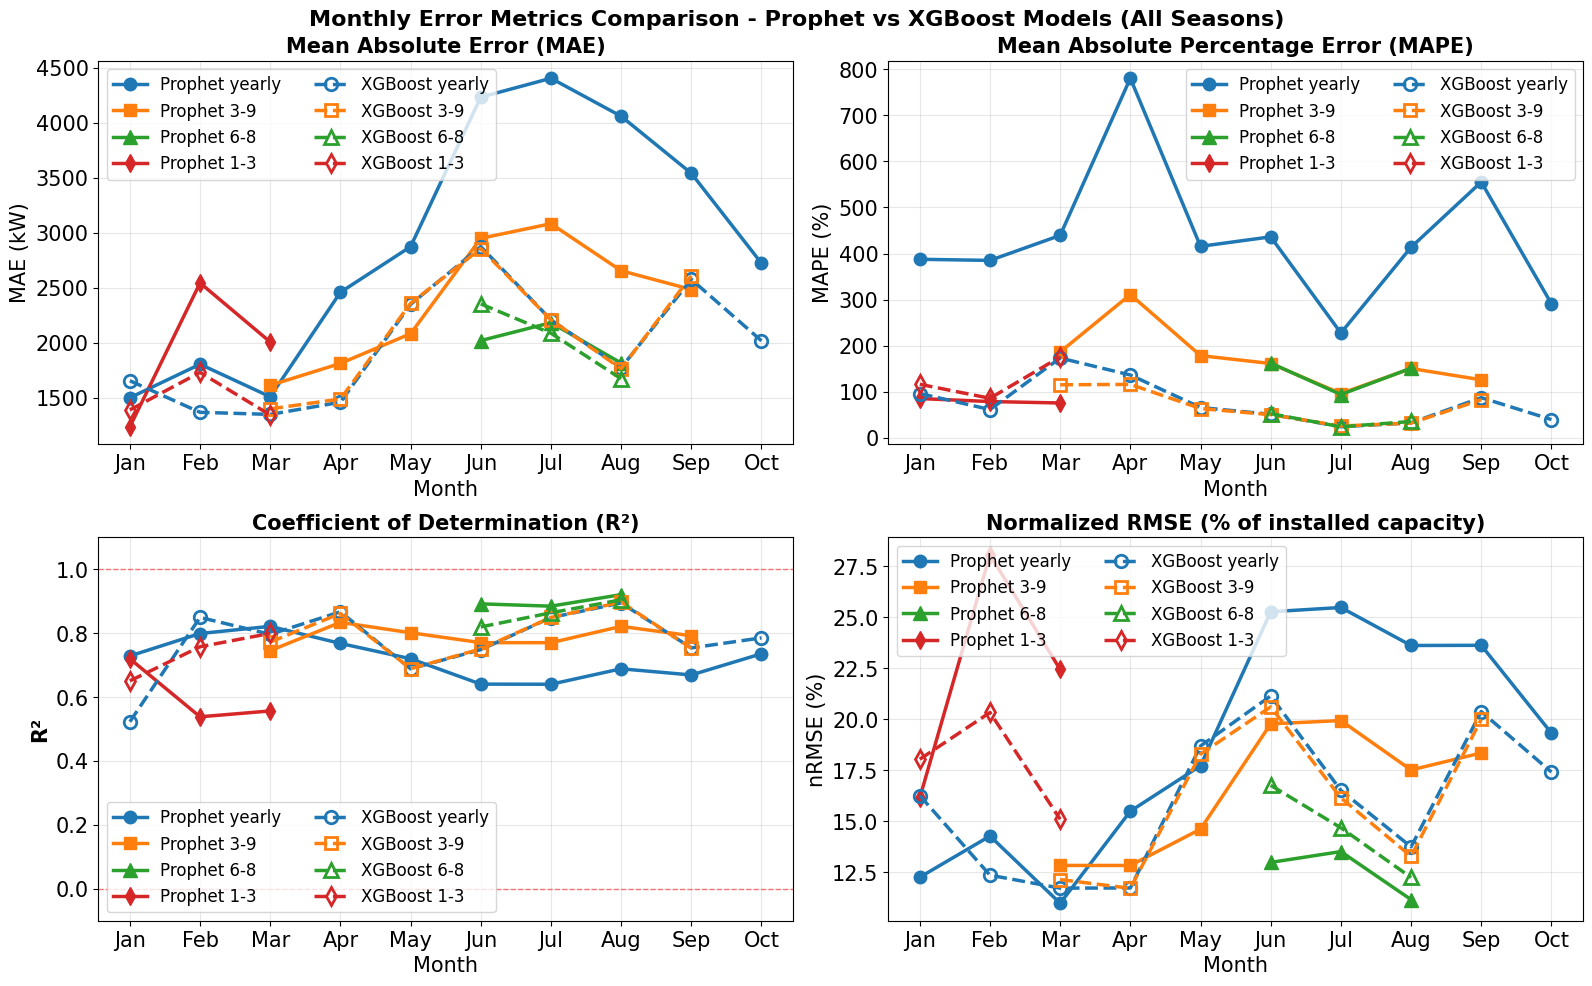

In [10]:
# Load winter data
df_pv_winter = pd.read_csv('pv_metrics_1-3.csv')
df_xg_winter = pd.read_csv('xg_metrics_1-3.csv')

# Create figure with 4 subplots (2x2 grid) including winter models
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('Monthly Error Metrics Comparison - Prophet vs XGBoost Models (All Seasons)', fontsize=16, fontweight='bold')

# Flatten axes for easier indexing
axes = axes.flatten()

# Define months for each dataset
months_pv_yearly = df_pv_yearly['Month'].tolist()
months_pv_sprsum = df_pv_sprsum['Month'].tolist()
months_pv_summer = df_pv_summer['Month'].tolist()
months_pv_winter = df_pv_winter['Month'].tolist()

months_xg_yearly = df_xg_yearly['Month'].tolist()
months_xg_sprsum = df_xg_sprsum['Month'].tolist()
months_xg_summer = df_xg_summer['Month'].tolist()
months_xg_winter = df_xg_winter['Month'].tolist()

# Plot 1: Mean Absolute Error (MAE)
# Prophet models - solid lines with filled markers
axes[0].plot(months_pv_yearly, df_pv_yearly['MAE'], marker='o', color='#1f77b4', linewidth=2.5, markersize=9, linestyle='-', markerfacecolor='#1f77b4', markeredgecolor='#1f77b4', label='Prophet yearly')
axes[0].plot(months_pv_sprsum, df_pv_sprsum['MAE'], marker='s', color='#ff7f0e', linewidth=2.5, markersize=9, linestyle='-', markerfacecolor='#ff7f0e', markeredgecolor='#ff7f0e', label='Prophet 3-9')
axes[0].plot(months_pv_summer, df_pv_summer['MAE'], marker='^', color='#2ca02c', linewidth=2.5, markersize=10, linestyle='-', markerfacecolor='#2ca02c', markeredgecolor='#2ca02c', label='Prophet 6-8')
axes[0].plot(months_pv_winter, df_pv_winter['MAE'], marker='d', color='#d62728', linewidth=2.5, markersize=9, linestyle='-', markerfacecolor='#d62728', markeredgecolor='#d62728', label='Prophet 1-3')
# XGBoost models - dashed lines with hollow markers
axes[0].plot(months_xg_yearly, df_xg_yearly['MAE'], marker='o', color='#1f77b4', linewidth=2.5, markersize=9, linestyle='--', markerfacecolor='none', markeredgecolor='#1f77b4', markeredgewidth=2, label='XGBoost yearly')
axes[0].plot(months_xg_sprsum, df_xg_sprsum['MAE'], marker='s', color='#ff7f0e', linewidth=2.5, markersize=9, linestyle='--', markerfacecolor='none', markeredgecolor='#ff7f0e', markeredgewidth=2, label='XGBoost 3-9')
axes[0].plot(months_xg_summer, df_xg_summer['MAE'], marker='^', color='#2ca02c', linewidth=2.5, markersize=10, linestyle='--', markerfacecolor='none', markeredgecolor='#2ca02c', markeredgewidth=2, label='XGBoost 6-8')
axes[0].plot(months_xg_winter, df_xg_winter['MAE'], marker='d', color='#d62728', linewidth=2.5, markersize=9, linestyle='--', markerfacecolor='none', markeredgecolor='#d62728', markeredgewidth=2, label='XGBoost 1-3')
axes[0].set_title('Mean Absolute Error (MAE)', fontsize=15, fontweight='bold')
axes[0].set_xlabel('Month', fontsize=15)
axes[0].set_ylabel('MAE (kW)', fontsize=15)
axes[0].grid(True, alpha=0.3)
axes[0].legend(fontsize=12, loc='best', ncol=2)
axes[0].tick_params(axis='both', labelsize=15)


# Plot 2: Mean Absolute Percentage Error (MAPE)
# Prophet models - solid lines with filled markers
axes[1].plot(months_pv_yearly, df_pv_yearly['MAPE'], marker='o', color='#1f77b4', linewidth=2.5, markersize=9, linestyle='-', markerfacecolor='#1f77b4', markeredgecolor='#1f77b4', label='Prophet yearly')
axes[1].plot(months_pv_sprsum, df_pv_sprsum['MAPE'], marker='s', color='#ff7f0e', linewidth=2.5, markersize=9, linestyle='-', markerfacecolor='#ff7f0e', markeredgecolor='#ff7f0e', label='Prophet 3-9')
axes[1].plot(months_pv_summer, df_pv_summer['MAPE'], marker='^', color='#2ca02c', linewidth=2.5, markersize=10, linestyle='-', markerfacecolor='#2ca02c', markeredgecolor='#2ca02c', label='Prophet 6-8')
axes[1].plot(months_pv_winter, df_pv_winter['MAPE'], marker='d', color='#d62728', linewidth=2.5, markersize=9, linestyle='-', markerfacecolor='#d62728', markeredgecolor='#d62728', label='Prophet 1-3')
# XGBoost models - dashed lines with hollow markers
axes[1].plot(months_xg_yearly, df_xg_yearly['MAPE'], marker='o', color='#1f77b4', linewidth=2.5, markersize=9, linestyle='--', markerfacecolor='none', markeredgecolor='#1f77b4', markeredgewidth=2, label='XGBoost yearly')
axes[1].plot(months_xg_sprsum, df_xg_sprsum['MAPE'], marker='s', color='#ff7f0e', linewidth=2.5, markersize=9, linestyle='--', markerfacecolor='none', markeredgecolor='#ff7f0e', markeredgewidth=2, label='XGBoost 3-9')
axes[1].plot(months_xg_summer, df_xg_summer['MAPE'], marker='^', color='#2ca02c', linewidth=2.5, markersize=10, linestyle='--', markerfacecolor='none', markeredgecolor='#2ca02c', markeredgewidth=2, label='XGBoost 6-8')
axes[1].plot(months_xg_winter, df_xg_winter['MAPE'], marker='d', color='#d62728', linewidth=2.5, markersize=9, linestyle='--', markerfacecolor='none', markeredgecolor='#d62728', markeredgewidth=2, label='XGBoost 1-3')
axes[1].set_title('Mean Absolute Percentage Error (MAPE)', fontsize=15, fontweight='bold')
axes[1].set_xlabel('Month', fontsize=15)
axes[1].set_ylabel('MAPE (%)', fontsize=15)
axes[1].grid(True, alpha=0.3)
axes[1].legend(fontsize=12, loc='best', ncol=2)
axes[1].tick_params(axis='both', labelsize=15)


# Plot 3: Coefficient of Determination (R²)
# Prophet models - solid lines with filled markers
axes[2].plot(months_pv_yearly, df_pv_yearly['R²'], marker='o', color='#1f77b4', linewidth=2.5, markersize=9, linestyle='-', markerfacecolor='#1f77b4', markeredgecolor='#1f77b4', label='Prophet yearly')
axes[2].plot(months_pv_sprsum, df_pv_sprsum['R²'], marker='s', color='#ff7f0e', linewidth=2.5, markersize=9, linestyle='-', markerfacecolor='#ff7f0e', markeredgecolor='#ff7f0e', label='Prophet 3-9')
axes[2].plot(months_pv_summer, df_pv_summer['R²'], marker='^', color='#2ca02c', linewidth=2.5, markersize=10, linestyle='-', markerfacecolor='#2ca02c', markeredgecolor='#2ca02c', label='Prophet 6-8')
axes[2].plot(months_pv_winter, df_pv_winter['R²'], marker='d', color='#d62728', linewidth=2.5, markersize=9, linestyle='-', markerfacecolor='#d62728', markeredgecolor='#d62728', label='Prophet 1-3')
# XGBoost models - dashed lines with hollow markers
axes[2].plot(months_xg_yearly, df_xg_yearly['R²'], marker='o', color='#1f77b4', linewidth=2.5, markersize=9, linestyle='--', markerfacecolor='none', markeredgecolor='#1f77b4', markeredgewidth=2, label='XGBoost yearly')
axes[2].plot(months_xg_sprsum, df_xg_sprsum['R²'], marker='s', color='#ff7f0e', linewidth=2.5, markersize=9, linestyle='--', markerfacecolor='none', markeredgecolor='#ff7f0e', markeredgewidth=2, label='XGBoost 3-9')
axes[2].plot(months_xg_summer, df_xg_summer['R²'], marker='^', color='#2ca02c', linewidth=2.5, markersize=10, linestyle='--', markerfacecolor='none', markeredgecolor='#2ca02c', markeredgewidth=2, label='XGBoost 6-8')
axes[2].plot(months_xg_winter, df_xg_winter['R²'], marker='d', color='#d62728', linewidth=2.5, markersize=9, linestyle='--', markerfacecolor='none', markeredgecolor='#d62728', markeredgewidth=2, label='XGBoost 1-3')
axes[2].axhline(y=1.0, color='red', linestyle='--', linewidth=1, alpha=0.5)
axes[2].axhline(y=0.0, color='red', linestyle='--', linewidth=1, alpha=0.5)
axes[2].set_title('Coefficient of Determination (R²)', fontsize=15, fontweight='bold')
axes[2].set_xlabel('Month', fontsize=15)
axes[2].set_ylabel('R²', fontweight='bold', fontsize=15)
axes[2].set_ylim(-0.1, 1.1)
axes[2].grid(True, alpha=0.3)
axes[2].legend(fontsize=12, loc='best', ncol=2)
axes[2].tick_params(axis='both', labelsize=15)


# Plot 4: Normalized RMSE (% of installed capacity)
# Prophet models - solid lines with filled markers
axes[3].plot(months_pv_yearly, df_pv_yearly['nRMSE'], marker='o', color='#1f77b4', linewidth=2.5, markersize=9, linestyle='-', markerfacecolor='#1f77b4', markeredgecolor='#1f77b4', label='Prophet yearly')
axes[3].plot(months_pv_sprsum, df_pv_sprsum['nRMSE'], marker='s', color='#ff7f0e', linewidth=2.5, markersize=9, linestyle='-', markerfacecolor='#ff7f0e', markeredgecolor='#ff7f0e', label='Prophet 3-9')
axes[3].plot(months_pv_summer, df_pv_summer['nRMSE'], marker='^', color='#2ca02c', linewidth=2.5, markersize=10, linestyle='-', markerfacecolor='#2ca02c', markeredgecolor='#2ca02c', label='Prophet 6-8')
axes[3].plot(months_pv_winter, df_pv_winter['nRMSE'], marker='d', color='#d62728', linewidth=2.5, markersize=9, linestyle='-', markerfacecolor='#d62728', markeredgecolor='#d62728', label='Prophet 1-3')
# XGBoost models - dashed lines with hollow markers
if 'nRMSE' in df_xg_yearly.columns:
    axes[3].plot(months_xg_yearly, df_xg_yearly['nRMSE'], marker='o', color='#1f77b4', linewidth=2.5, markersize=9, linestyle='--', markerfacecolor='none', markeredgecolor='#1f77b4', markeredgewidth=2, label='XGBoost yearly')
if 'nRMSE' in df_xg_sprsum.columns:
    axes[3].plot(months_xg_sprsum, df_xg_sprsum['nRMSE'], marker='s', color='#ff7f0e', linewidth=2.5, markersize=9, linestyle='--', markerfacecolor='none', markeredgecolor='#ff7f0e', markeredgewidth=2, label='XGBoost 3-9')
if 'nRMSE' in df_xg_summer.columns:
    axes[3].plot(months_xg_summer, df_xg_summer['nRMSE'], marker='^', color='#2ca02c', linewidth=2.5, markersize=10, linestyle='--', markerfacecolor='none', markeredgecolor='#2ca02c', markeredgewidth=2, label='XGBoost 6-8')
if 'nRMSE' in df_xg_winter.columns:
    axes[3].plot(months_xg_winter, df_xg_winter['nRMSE'], marker='d', color='#d62728', linewidth=2.5, markersize=9, linestyle='--', markerfacecolor='none', markeredgecolor='#d62728', markeredgewidth=2, label='XGBoost 1-3')
axes[3].set_title('Normalized RMSE (% of installed capacity)', fontsize=15, fontweight='bold')
axes[3].set_xlabel('Month', fontsize=15)
axes[3].set_ylabel('nRMSE (%)', fontsize=15)
axes[3].grid(True, alpha=0.3)
axes[3].legend(fontsize=12, loc='best', ncol=2)
axes[3].tick_params(axis='both', labelsize=15)


plt.tight_layout()
plt.show()
fig.savefig("figures/monthly_error_metrics_JJA2025.pdf", bbox_inches="tight")

In [9]:
# Create a comprehensive comparison table
import pandas as pd

# Define the months to include
winter_months = ['Jan', 'Feb', 'Mar']
summer_months = ['Jun', 'Jul', 'Aug']

# Initialize empty list to store rows
rows = []

# Helper function to get metrics for a specific month from a dataframe
def get_month_metrics(df, month_name):
    month_data = df[df['Month'] == month_name]
    if len(month_data) > 0:
        return {
            'MAE': month_data['MAE'].values[0],
            'MAPE': month_data['MAPE'].values[0],
            'R²': month_data['R²'].values[0],
            'nRMSE': month_data['nRMSE'].values[0]
        }
    return {'MAE': None, 'MAPE': None, 'R²': None, 'nRMSE': None}

# Process winter months
for month in winter_months:
    rows.append({'Period': month, 'Model': 'Prophet', **get_month_metrics(df_pv_winter, month)})
    rows.append({'Period': month, 'Model': 'Prophet_disaggregated', **get_month_metrics(df_pv_winter_disagg, month)})
    rows.append({'Period': month, 'Model': 'XGBoost', **get_month_metrics(df_xg_winter, month)})
    rows.append({'Period': month, 'Model': 'XGBoost_disaggregated', **get_month_metrics(df_xg_winter_disagg, month)})

# Process summer months
for month in summer_months:
    rows.append({'Period': month, 'Model': 'Prophet', **get_month_metrics(df_pv_summer, month)})
    rows.append({'Period': month, 'Model': 'Prophet_disaggregated', **get_month_metrics(df_pv_summer_disagg, month)})
    rows.append({'Period': month, 'Model': 'XGBoost', **get_month_metrics(df_xg_summer, month)})
    rows.append({'Period': month, 'Model': 'XGBoost_disaggregated', **get_month_metrics(df_xg_summer_disagg, month)})

# Create DataFrame
comparison_df = pd.DataFrame(rows)

# Set Period and Model as index for better display (optional)
comparison_table = comparison_df#.set_index(['Period', 'Model'])

# Display the table with styling
styled_table = comparison_table.style.format({
    'MAE': '{:.2f}',
    'MAPE': '{:.2f}',
    'R²': '{:.4f}',
    'nRMSE': '{:.2f}'
}).background_gradient(subset=['MAE', 'MAPE', 'nRMSE'], cmap=None).background_gradient(subset=['R²'], cmap=None)

display(styled_table)
#styled_table.savefig('comparison_table.png')
# Optionally export to CSV
# comparison_df.to_csv('model_comparison_table.csv', index=False)

,Period,Model,MAE,MAPE,R²,nRMSE
0,Jan,Prophet,1238.54,85.19,0.7199,16.16
1,Jan,Prophet_disaggregated,1488.52,130.06,0.5574,22.31
2,Jan,XGBoost,1391.49,116.17,0.6507,18.05
3,Jan,XGBoost_disaggregated,2445.15,51.18,0.5403,20.06
4,Feb,Prophet,2544.35,78.71,0.5383,28.07
5,Feb,Prophet_disaggregated,927.68,93.25,0.9303,9.82
6,Feb,XGBoost,1732.63,85.79,0.7576,20.34
7,Feb,XGBoost_disaggregated,4285.41,50.97,0.1373,27.29
8,Mar,Prophet,2008.30,75.57,0.5566,22.45
9,Mar,Prophet_disaggregated,1655.50,197.01,0.7244,19.36


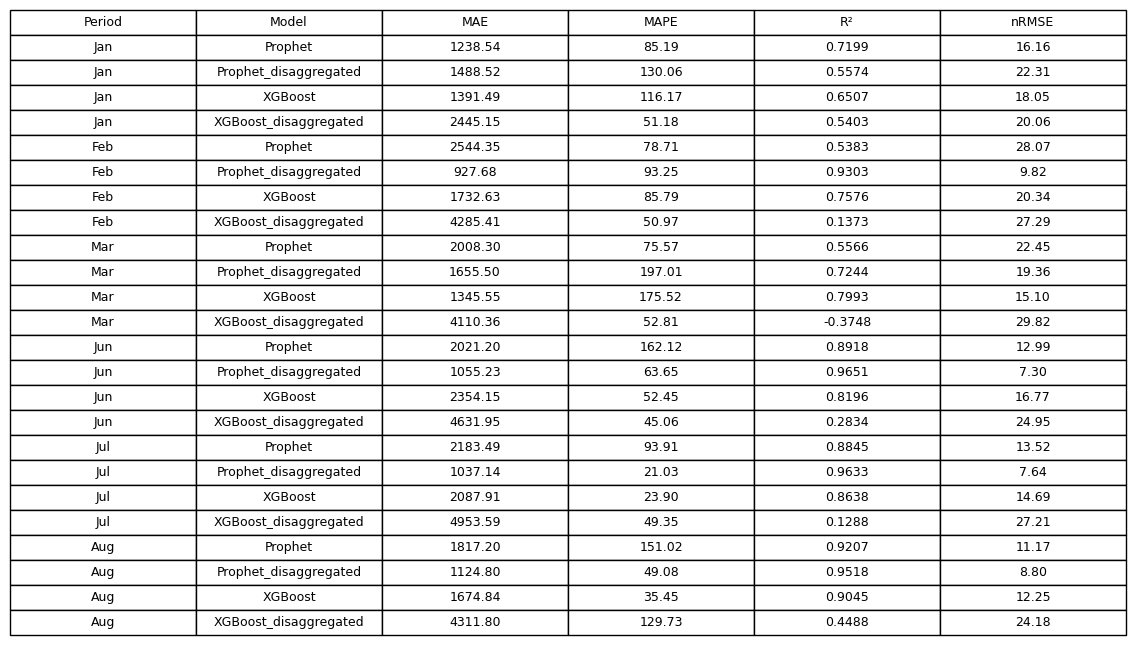

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Create figure and axis
fig, ax = plt.subplots(figsize=(12, 8))
ax.axis('tight')
ax.axis('off')

# Format the cell values with specific decimal places
formatted_data = []
for row in comparison_table.values:
    formatted_row = []
    for i, val in enumerate(row):
        col_name = comparison_table.columns[i]
        
        if col_name in ['Period', 'Model']:
            formatted_row.append(str(val))
        elif val is None or (isinstance(val, float) and np.isnan(val)):
            formatted_row.append('nan')
        elif col_name == 'R²':
            formatted_row.append(f'{val:.4f}')  # 4 decimals for R²
        else:
            formatted_row.append(f'{val:.2f}')  # 2 decimals for others
    formatted_data.append(formatted_row)

# Create table from dataframe with formatted values
table = ax.table(cellText=formatted_data,
                 colLabels=comparison_table.columns,
                 cellLoc='center',
                 loc='center')

table.auto_set_font_size(False)
table.set_fontsize(9)
table.scale(1.2, 1.5)

plt.savefig('comparison_table.png', dpi=300, bbox_inches='tight')
plt.show()